# วิเคราะห์การถดถอยพหุนาม


หากต้องการปัญหาที่ผลเฉลยไม่น่าจะเป็นเชิงเส้น ก็ต้องปรับวิธีใหม่ซึ่งซับซ้อนขึ้น รูปแบบคำตอบที่ง่ายรองลงมาจากเชิงเส้นธรรมดาก็คืออยู่ในรูปพหุนาม นั่นคือเป็นลักษณะแบบนี้ 
<p>z = w0 + w1*x + w2*x**2 + w3*x**3 + ... </p>

<p>คล้ายกับสมการเชิงเส้นหลายมิติ เพียงแต่ว่าเปลี่ยนจาก x1 เป็น x**1 ส่วน x2 เป็น x**2 และ xn เป็น x**n </p>


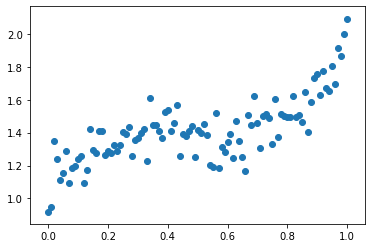

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,1,101)
z = 1+3*x-7*x**2+5*x**3+0.1*np.random.randn(101)
plt.scatter(x,z)
plt.show()

จากตรงนี้จะเห็นว่าคำตอบที่ควรจะเป็นก็คือ w0=5, w1=21, w2=31 และ w3=1

เดิมทีเรามีแค่ x ตัวเดียว แต่ว่าต้องสร้างค่า x ที่ยกกำลังต่างๆตั้งแต่ 0 ไปจนถึงดีกรีที่ต้องการ

โดยใช้วิธีการดังนี้

In [3]:
deg = 3 # ดีกรีที่ต้องการ
X = np.stack([x**i for i in range(deg+1)],1)
print(X[::20])

[[1.    0.    0.    0.   ]
 [1.    0.2   0.04  0.008]
 [1.    0.4   0.16  0.064]
 [1.    0.6   0.36  0.216]
 [1.    0.8   0.64  0.512]
 [1.    1.    1.    1.   ]]


In [4]:
x

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

หลักแรกคือ x0 ซึ่งจะนำไปคูณกับ w0 (w0 = b) 

เขียนคลาสสำหรับการวิเคราะห์การถดถอยพหุนามแบบตัวแปรเดียวได้ดังนี้

In [5]:
class ThotthoiPhahunam1D:
    def __init__(self,eta,deg=2):
        self.eta = eta
        self.deg = deg

    def rianru(self,x,z,d_yut=1e-7,n_thamsam=100000):
        X = np.stack([x**i for i in range(self.deg+1)],1) # ทำให้เป็นพหุนาม
        self.w = np.zeros(X.shape[1])
        dw = np.zeros(X.shape[1])
        h = np.dot(X,self.w)
        self.sse = [self.ha_sse(h,z)]
        for i in range(n_thamsam):
            eee = 2*(z-h)*self.eta
            dw = np.dot(eee,X)
            self.w += dw
            h = np.dot(X,self.w)
            self.sse += [self.ha_sse(h,z)]
            if(np.all(np.abs(dw)<d_yut)):
                break

    def thamnai(self,x):
        X = np.stack([x**i for i in range(self.deg+1)],1)
        return np.dot(X,self.w)

    def ha_sse(self,h,z):
        return ((h-z)**2).sum()

In [6]:
eta = 0.005
deg = 3
tp = ThotthoiPhahunam1D(eta,deg)
tp.rianru(x,z)

In [7]:
np.zeros(X.shape[1]) # 0 -> shape row, 1 -> shape col 

array([0., 0., 0., 0.])

In [8]:
print(tp.w)

[ 1.03348117  2.60364846 -6.00348239  4.32794041]


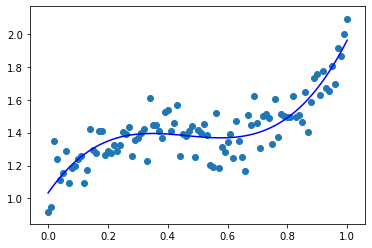

In [9]:
plt.scatter(x,z)
x = np.linspace(0,1,101)
h = tp.thamnai(x)
plt.plot(x,h,'b')
plt.show()

เส้นที่ทำนายขึ้น (h) ลากผ่านกลางจุดข้อมูล (z) อย่างสวยงาม แสดงให้เห็นว่าการคำนวณถูกต้อง

<b>ตัวอย่าง</b> ปัญหาประกอบด้วย 2 ตัวแปรต้นขึ้นไป ซึ่งจะซับซ้อนไปอีก

หากใช้ sklearn เข้าช่วยก็อาจสามารถทำได้ง่ายขึ้น ในมอดูลย่อย preprocessing ของ sklearn มีคลาสที่ชื่อ PolynomialFeatures

In [10]:
x = np.random.uniform(0,4,500)
y = np.random.uniform(0,4,500)
z = 22 + 4*x + 7*y + x*x - 6*x*y + y*y + np.random.randn(500)

In [11]:
from sklearn.preprocessing import PolynomialFeatures as Pf

xy = np.stack([x,y],1)
xy_ = Pf(deg).fit_transform(xy)

เมื่อใช้ PolynomialFeatures แบบนี้แล้วจะใช้กับปัญหาที่มีตัวแปรต้นกี่ตัวก็ได้ เช่นถ้าลองใช้กับ 3 ตัวแปรดู แจกแจงถึงดีกรี 2

In [12]:
x1 = np.linspace(0,2,3)
x2 = np.linspace(0,3,3)
x3 = np.linspace(0,5,3)
print(Pf(2).fit_transform(np.stack([x1,x2,x3],1)))

[[ 1.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 1.    1.    1.5   2.5   1.    1.5   2.5   2.25  3.75  6.25]
 [ 1.    2.    3.    5.    4.    6.   10.    9.   15.   25.  ]]


In [15]:
x1

array([0., 1., 2.])

In [16]:
x2

array([0. , 1.5, 3. ])

In [17]:
x3

array([0. , 2.5, 5. ])

ผลที่ได้มี 10 พจน์ ตามนี้ 1, x1, x2, x3, x1x1, x1x2, x1x3, x2x2, x2x3, x3x3

In [28]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures as Pf

class ThotthoiPhahunam:
    def __init__(self,eta,deg=2):
        self.eta = eta
        self.deg = deg

    def rianru(self,X,z,d_yut=1e-7,n_thamsam=100000):
        X = Pf(self.deg).fit_transform(X)
        self.w = np.zeros(X.shape[1])
        print(self.w)
        dw = np.zeros(X.shape[1])
        h = np.dot(X,self.w)
        self.sse = [self.ha_sse(h,z)]
        for i in range(n_thamsam):
            eee = 2*(z-h)*self.eta
            dw = np.dot(eee,X)
            self.w += dw
            h = np.dot(X,self.w)
            self.sse += [self.ha_sse(h,z)]
            if(np.all(np.abs(dw)<d_yut)):
                break

    def thamnai(self,X):
        X = Pf().fit_transform(X)
        return np.dot(X,self.w)

    def ha_sse(self,h,z):
        return ((h-z)**2).sum()

In [29]:
X = np.stack([x,y],1)
eta = 0.00001
deg = 2
tp = ThotthoiPhahunam(eta,deg)
tp.rianru(X,z)


[0. 0. 0. 0. 0. 0.]


In [34]:
print(tp.w)

[22.43690695  3.82483168  6.75803174  1.01153399 -5.96169141  1.04139615]


ได้ค่าออกมาใกล้เคียงกับ [22,4,7,1,-6,1] 